# Modelagem e Simulação Multifísica - Aula 03

## 1 - Exemplo de um pêndulo simples

### 1.1 - O problema de valor inicial

Considere uma massa $m$ presa a um eixo por meio de uma haste rígida de massa desprezível e comprimento $L$, conforme apresentado na figura a seguir.
<p>
    <img width="200" height="100" src="./Figs/pendulo_geo.jpeg">
</p>
<p>
    <em> Geometria do pêndulo. Fonte: https://ysjournal.com/</em>
</p>
O problema é governado pela versão rotacional da segunda lei de Newton:
\begin{equation}
\tau = I\cdot\alpha
\end{equation}

onde $\tau$ é o torque, $I$ o momento de inércia e $\alpha=\ddot \theta$ é a aceleração angular. Conforme mostrado na figura, a única componente da força que contribui para o torque é a parcela $mg\sin(\theta)$. Considerando que para uma massa pontual $I=mL^2$, a equação do movimento angular pode ser reescrita como: 

\begin{equation}
-Lmg\sin(\theta) = mL^2\cdot\ddot \theta
\end{equation}

Reorganizando os termos obtemos a ODE que governa o problema de um pêndulo simples.

\begin{equation}
\ddot \theta = -\frac{g}{L}\sin(\theta) 
\end{equation}

Dadas a posição e a velocidade angular iniciais, 

\begin{eqnarray}
\theta(t_0) &=& \theta_0 \\
\dot\theta(t_0) &=& \omega_0
\end{eqnarray}

a formulação do problema está completa. 

#### a) Instabilidade

Reparem que o sistema resultante é marginalmente estável para todos os pontos, com exceção apenas do ponto $(\theta = \pm180,\omega = 0)$. Esse ponto representa um ponto de equilíbrio instável onde qualquer perturbação fará com que o pêndulo entre em movimento. Para as demais condições inicias, pequenas variações nas condições iniciais proporcionarão pequenas variações na forma com que o pêndulo oscila. Adicionando um parcela de perda ao sistema, o problema se torna estável. 

### 1.2 - Representação por espaço de estados

Entretanto, a equação governante é uma ODE não linear de segunda ordem que não pode ser resolvida diretamente pelos métodos apresentados na Aula01. Como visto na aula anterior, os métodos foram desenvolvidos para equações de primeira ordem. Para contornar esse problema, podemos decompor a equação de segunda ordem em duas equações de primeira ordem.  

Definindo $x_1 = \theta$ e $x_2 = \dot\theta$, a equação governante pode ser reescrita pelo seguinte sistema de equações de primeira ordem. 

\begin{eqnarray}
\dot x_1 &=& x_2 \\
\dot x_2 &=& -\frac{g}{L}\sin(x_1) 
\end{eqnarray}

### 1.3 - Resolvendo pelo método de Euler

Conforme visto na aula anterior, a aproximação de Euler resulta em um método explicito da forma 
\begin{equation}
v(t_{m+1}) = v(t_{m}) + \Delta t f(v(t_m))
\end{equation}

que pode ser aplicado simultaneamente nas equações de estado do sistema. Na primeira equação temos $f(v(t_m))=x_2$ e na segunda $f(v(t_m))=-g/L\sin(x_1)$. Aplicando o método de Euler, a solução do problema pode ser aproximada por:

\begin{eqnarray}
x_1(t_{m+1}) &=& x_1(t_{m}) + \Delta t \cdot x_2(t_m) \\
x_2(t_{m+1}) &=& x_2(t_{m}) - \Delta t \cdot \frac{g}{L}\sin[x_1(t_m)] \\
x_1(t_0) &=& \theta_0 \\
x_2(t_0) &=& \omega_0
\end{eqnarray}

Definindo um exemplo de teste:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# problem parameters (International System of Units)
L = 0.10
g = 9.8 

t_0 = 0
t_end = 4
x_0 = [np.pi/6, 0] # initial condition [theta_0, omega_0]

def f(t,x): # function f(x(t),t) 
    f0 = x[1]
    f1 = - g/L*math.sin(x[0]) 
    return [f0, f1]

A solução pelo método de Euler é apresentada a seguir:

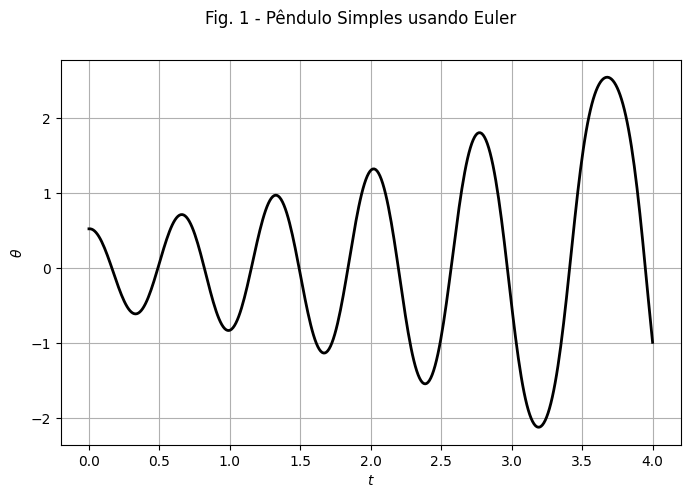

In [2]:
# Euler parameter
dt = 1/100
m_max = np.ceil((t_end-t_0)/dt)
t = np.linspace(t_0, t_end, int(m_max))
v = np.zeros((2,int(m_max)))

# Euler loop
v[:, 0] = x_0

for m in range(int(m_max-1)):
        v[0,m+1] = v[0,m] +dt*f(t[m],v[:,m])[0]
        v[1,m+1] = v[1,m] +dt*f(t[m],v[:,m])[1]
        
# plot horizontal line
fig = plt.figure(figsize=(8,5))
plt.plot(t, v[0,:], 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$');
plt.ylabel('$\\theta$');
fig.suptitle('Fig. 1 - Pêndulo Simples usando Euler');


Repare que para esse problema, o método de Euler será sempre instável.

Outra forma interessante de apresentar os resultados é através do plano de fase $\omega\times\theta$.

<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_118/1736872860.py:6: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$');


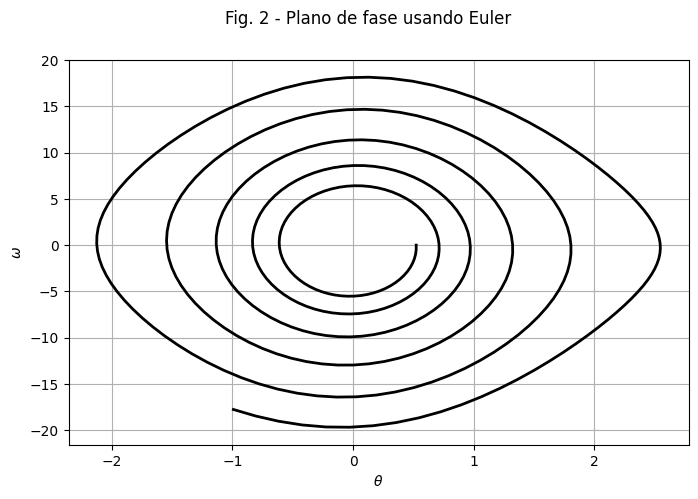

In [3]:
# plot horizontal line
fig = plt.figure(figsize=(8,5))
plt.plot(v[0,:],v[1,:], 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$\\theta$');
plt.ylabel('$\omega$');
fig.suptitle('Fig. 2 - Plano de fase usando Euler');


### 1.4 - Resolvendo pelo método do trapézio

A aproximação do trapézio resulta em um método implícito da forma:

\begin{equation}
v(t_{m+1}) =  \frac{\Delta t}{2}\left[ f(v(t_{m+1}))+f(v(t_m)) \right] + v(t_m) 
\end{equation}

Aplicando o método do trapézio nas equações de estado do pêndulo, obtemos o seguinte sistema

\begin{eqnarray}
x_1(t_{m+1}) &=&  \frac{\Delta t}{2}\left[ x_2(t_{m+1}) + x_2(t_m) \right] + x_1(t_m) \\
x_2(t_{m+1}) &=&  -\frac{\Delta t}{2}\frac{g}{L}\left[ \sin(x_1(t_{m+1}) + \sin(x_1(t_{m})  \right] + x_2(t_m) 
\end{eqnarray}

Reparem que tanto $x_1(t_{m+1})$ quanto $x_2(t_{m+1})$ aparecem de ambos os lados da equação. Reorganizando os termos desconhecidos do lado esquerdo temos

\begin{eqnarray}
x_1(t_{m+1}) - \frac{\Delta t}{2}x_2(t_{m+1}) &=&  x_1(t_m) +\frac{\Delta t}{2}x_2(t_m) \\
\frac{\Delta t}{2}\frac{g}{L}\sin(x_1(t_{m+1})  + x_2(t_{m+1}) &=&  -\frac{\Delta t}{2}\frac{g}{L}\sin(x_1(t_{m}) + x_2(t_m) 
\end{eqnarray}

sendo que esse sistema de equações não lineares deve ser resolvido em cada iteração.

#### a) Aproximação linear

Para pequenos deslocamentos em torno do ponto de equilíbrio, podemos usar a aproximação $sin(\theta) \approx \theta$. Como isso o sistema não linear se reduz ao sistema linear

\begin{eqnarray}
x_1(t_{m+1}) - \frac{\Delta t}{2}x_2(t_{m+1}) &=&  x_1(t_m) +\frac{\Delta t}{2}x_2(t_m) \\
\frac{\Delta t}{2}\frac{g}{L}x_1(t_{m+1}  + x_2(t_{m+1}) &=&  -\frac{\Delta t}{2}\frac{g}{L}x_1(t_{m} + x_2(t_m) 
\end{eqnarray}

Utilizando representação matricial

\begin{eqnarray}
\begin{bmatrix}
1      &  - \frac{\Delta t}{2} \\
\frac{\Delta t}{2}\frac{g}{L}      &   1    \\
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1(t_{m+1})     \\
x_2(t_{m+1})     \\
\end{bmatrix}
&=&
\begin{bmatrix}
1      &  \frac{\Delta t}{2} \\
-\frac{\Delta t}{2}\frac{g}{L}      &   1    \\
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1(t_m)     \\
x_2(t_m)     \\
\end{bmatrix}  
\end{eqnarray}

Ou de forma compacta $Ax(t_{m+1}) = Bx(t_{m})$

Dessa forma, dada a condição inicial $x(t_0) = x_0$ a atualização dos valores de $x(t_{m+1})$ para o problema linear é dada por

\begin{equation}
x(t_{m+1}) = A^{-1}Bx(t_{m})
\end{equation}



<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:36: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_118/2006268244.py:36: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$');


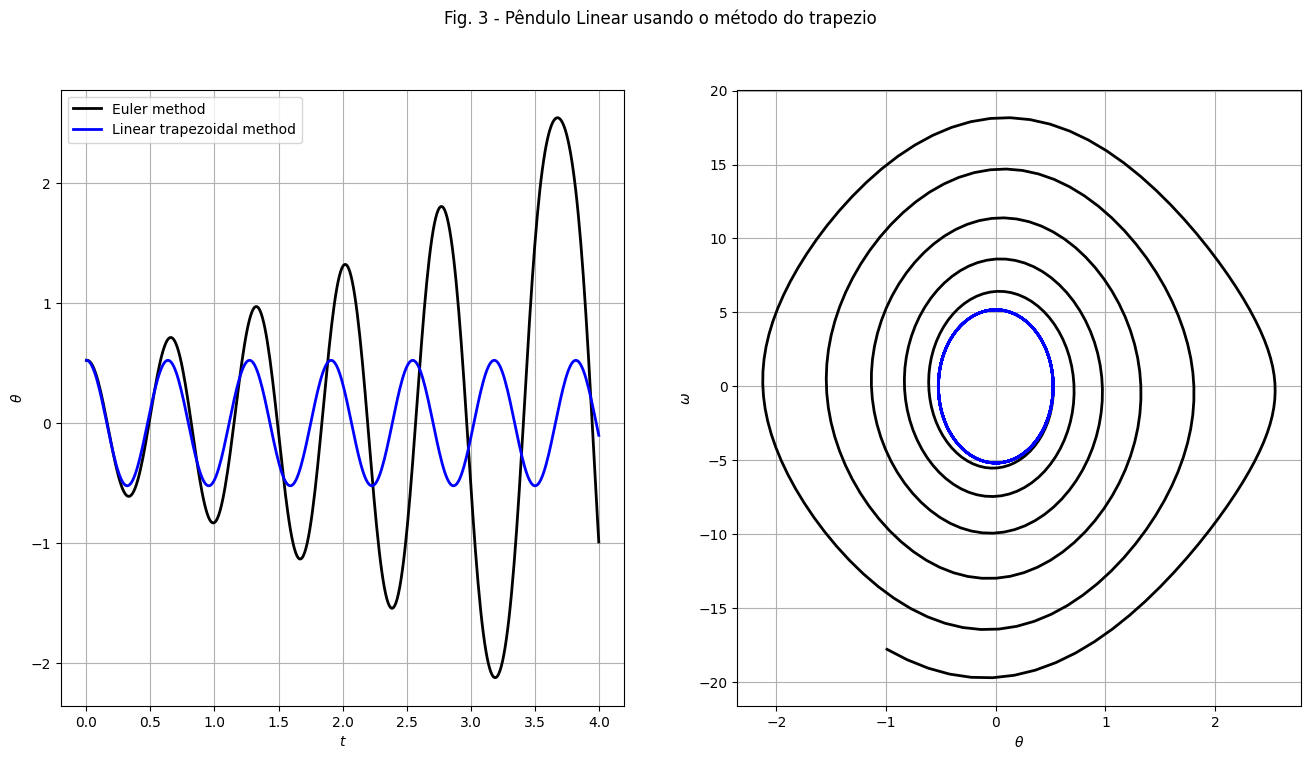

In [4]:
from numpy.linalg import inv
# problem parameters defined in cell [1]
# L, g, x_0

# Trapezoidal methdo
# Uses de same dt, m_max and time vector defined in cell [1]
v_trapl = np.zeros((2,int(m_max)))

A = np.array([[1, -dt/2],[dt*g/2/L, 1]])
B = np.array([[1, dt/2],[-dt*g/2/L, 1]])

invA = inv(A)

# Linear Trapezoidal loop
v_trapl[:,0] = x_0

for m in range(int(m_max-1)):
    v_trapl[:,m+1] = invA.dot(B.dot(v_trapl[:,m]))
    
# plot horizontal line
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(t, v[0,:], 'k', linewidth=2); 
plt.plot(t, v_trapl[0,:], 'b', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$');
plt.ylabel('$\\theta$');
plt.legend(['Euler method','Linear trapezoidal method'], loc='upper left');
fig.suptitle('Fig. 3 - Pêndulo Linear usando o método do trapezio');

plt.subplot(1, 2, 2)
plt.plot(v[0,:],v[1,:], 'k', linewidth=2);
plt.plot(v_trapl[0,:],v_trapl[1,:], 'b', linewidth=2); 
plt.grid(True);
plt.xlabel('$\\theta$');
plt.ylabel('$\omega$');

Como previsto, para o modelo linear, a resposta do sistema é harmônica e o método do trapézio é estável.

#### b) Aproximação não linear

Para resolver o sistema não linear em cada iteração do método do trapézio, podemos faze uso da função <em> fsolve </em> da biblioteca <em> scipy.optimize </em>. A função <em> fsolve </em> retorna as raízes do sistema de equações $fun(x) = 0$.
A sintaxe da função é dada a seguir:

<center>
    <em> fsolve(func, x0, args=(), fprime=None, ...) </em>
</center>

Parâmetros principais:

* fun: (callable) </p>
Função func$(x, aux_1, ... , aux_N)$. Onde $x$ o vetor solução e $aux_i$ são argumentos adicionais passados à função <em> fsolve </em> por meio do parâmetro <em> args </em> .

* x0: ndarray </p>
Chute inicial para a solução $fun(x) = 0$

Para fazer uso da função <em> fsolve </em>, o sistema de equações não lineares deve ser reescrito por meio de equações homogêneas onde as variáveis $x(t_{m+1})$ são a raiz do problema e os valores $x(t_{m})$ são passados à função como valores auxiliares. Adicionalmente, $x(t_{m})$ é usado como chute inicial para a iteração $m+1$. Reescrevendo o problema não linear do método do trapézio:  

\begin{eqnarray}
x_1(t_{m+1}) - \frac{\Delta t}{2}x_2(t_{m+1}) - x_1(t_m) -\frac{\Delta t}{2}x_2(t_m) &=& 0 \\
\frac{\Delta t}{2}\frac{g}{L}\sin(x_1(t_{m+1})  + x_2(t_{m+1}) +\frac{\Delta t}{2}\frac{g}{L}\sin(x_1(t_{m}) - x_2(t_m) &=& 0 
\end{eqnarray}

<>:42: SyntaxWarning: invalid escape sequence '\o'
<>:42: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_118/2680201802.py:42: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$');


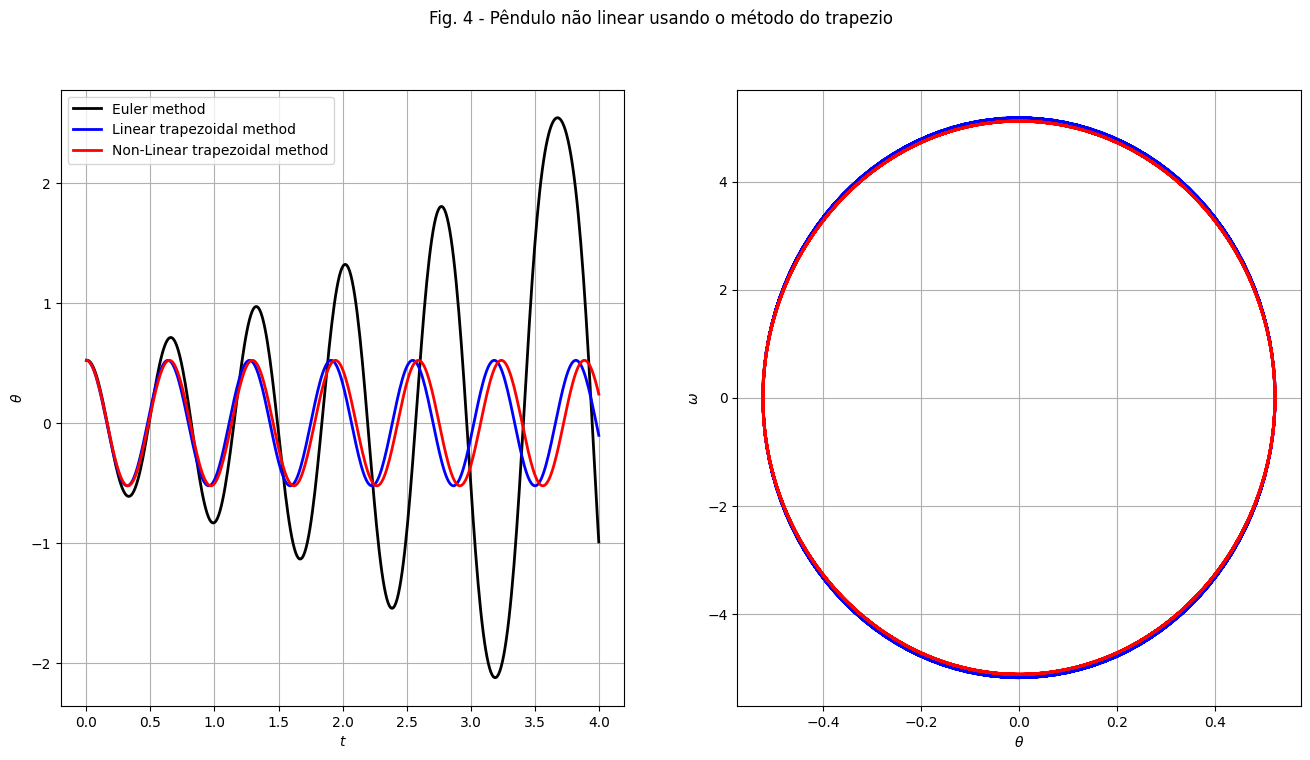

In [5]:
from scipy.optimize import fsolve
# problem parameters defined in cell [1]
# L, g, x_0

# non-linear equations
def nlequations(xm1,xm,dt,g,L):
    x1, x2 = xm1
    x1m , x2m = xm
    
    k = dt*g/2/L
    
    func1 = x1 - dt/2*x2 - x1m -dt/2*x2m
    func2 = k*math.sin(x1) + x2 + k*math.sin(x1m) - x2m
    
    return (func1, func2)

# non-linear Trapezoidal loop
v_trapnl = np.zeros((2,int(m_max)))
v_trapnl[:,0] = x_0

for m in range(int(m_max-1)):
    v_trapnl[:,m+1] = fsolve(nlequations,  v_trapnl[:,m], args=(v_trapnl[:,m], dt,g,L))
    
# plot horizontal line
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(t, v[0,:], 'k', linewidth=2); 
plt.plot(t, v_trapl[0,:], 'b', linewidth=2); 
plt.plot(t, v_trapnl[0,:], 'r', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$');
plt.ylabel('$\\theta$');
plt.legend(['Euler method','Linear trapezoidal method','Non-Linear trapezoidal method'], loc='upper left');
fig.suptitle('Fig. 4 - Pêndulo não linear usando o método do trapezio');

plt.subplot(1, 2, 2)
#plt.plot(v[0,:],v[1,:], 'k', linewidth=2);
plt.plot(v_trapl[0,:],v_trapl[1,:], 'b', linewidth=2); 
plt.plot(v_trapnl[0,:],v_trapnl[1,:], 'r', linewidth=2); 
plt.grid(True);
plt.xlabel('$\\theta$');
plt.ylabel('$\omega$');

Reparem que o problema não linear possui um período ligeiramente diferente do problema linear. Adicionalmente, o plano de fase apresenta um comportamento levemente distorcido o que demonstra que o problema não é harmônico.

### 1.5 - Resolvendo por meio da função solve_ivp

A função solve_ivp pode ser utilizada diretamente a partir das equações de estado do problema. A função $f(t,x)$ para o problema não linear é dada por: 

\begin{eqnarray}
f_1(t,x) &=& x_2 \\
f_2(t,x) &=& -\frac{g}{L}\sin(x_1) 
\end{eqnarray}

Essa função foi definida na cell [1].

A seguir o método é ilustrado usando a configuração default "RK45 (default): Explicit Runge-Kutta method of order 5(4)". Repare que o RK45 tem passo variado e requer muito menos pontos para alcançar $t_end$. Para comparar os resultados, o parâmetro <em> t_eval </em> foi utilizado para forçar que a solução seja calculada nos mesmos passos de tempo usados pelos demais métodos. 

<>:26: SyntaxWarning: invalid escape sequence '\o'
<>:26: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_118/3551180244.py:26: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$');


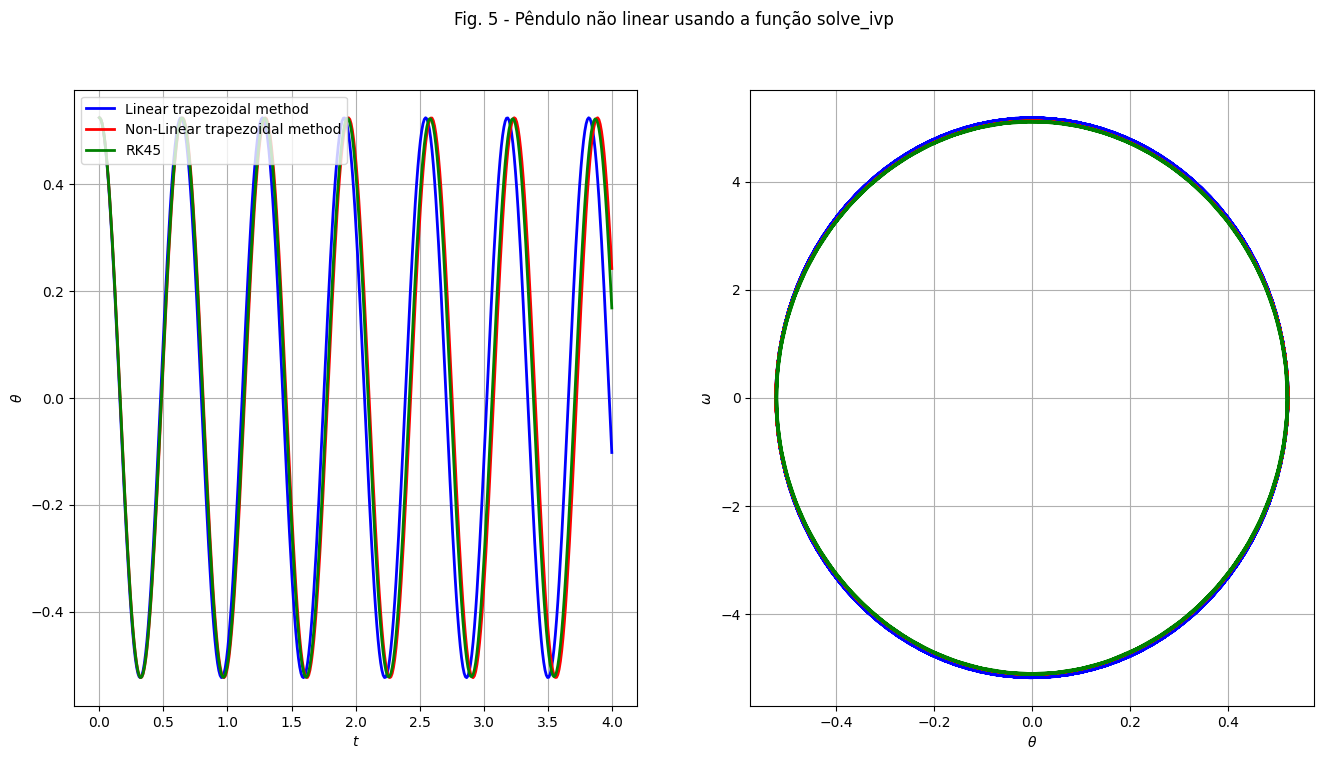

In [6]:
from scipy.integrate import solve_ivp
# problem parameters defined in cell [1]
# t_0, t_end, x_0.

sol = solve_ivp(f, [t_0, t_end],x_0, t_eval=t) # t_eval=t force the same point of the Euler method 

# plot horizontal line
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(t, v_trapl[0,:], 'b', linewidth=2); 
plt.plot(t, v_trapnl[0,:], 'r', linewidth=2);
plt.plot(sol.t, sol.y[0,:], 'g', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$');
plt.ylabel('$\\theta$');
plt.legend(['Linear trapezoidal method','Non-Linear trapezoidal method', 'RK45'], loc='upper left');
fig.suptitle('Fig. 5 - Pêndulo não linear usando a função solve_ivp');

plt.subplot(1, 2, 2)
#plt.plot(v[0,:],v[1,:], 'k', linewidth=2);
plt.plot(v_trapl[0,:],v_trapl[1,:], 'b', linewidth=2); 
plt.plot(v_trapnl[0,:],v_trapnl[1,:], 'r', linewidth=2);
plt.plot(sol.y[0,:],sol.y[1,:], 'g', linewidth=2); 
plt.grid(True);
plt.xlabel('$\\theta$');
plt.ylabel('$\omega$');